In [26]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [27]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

In [28]:
# Load dataset
df = pd.read_csv("data.csv", delimiter=';')

In [29]:
df.columns = df.columns.str.strip()

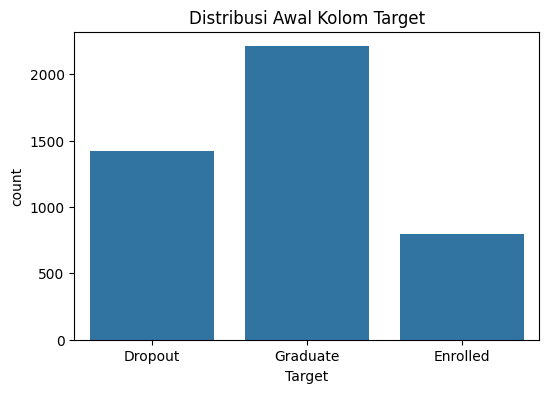

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribusi Awal Kolom Target")
plt.show()

In [31]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [32]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [33]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Target')


In [34]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [35]:
# Pisahkan fitur dan target
X = df.drop(columns='Target')
y = df['Target']


In [36]:
# Split data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
# Model AdaBoost
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)


In [40]:
# Latih model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [41]:
# Prediksi
y_pred_ada = ada_model.predict(X_test)


In [42]:
# Evaluasi
accuracy_ada = accuracy_score(y_test, y_pred_ada)
report_ada = classification_report(y_test, y_pred_ada, target_names=label_encoder.classes_)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
kappa_ada = cohen_kappa_score(y_test, y_pred_ada)


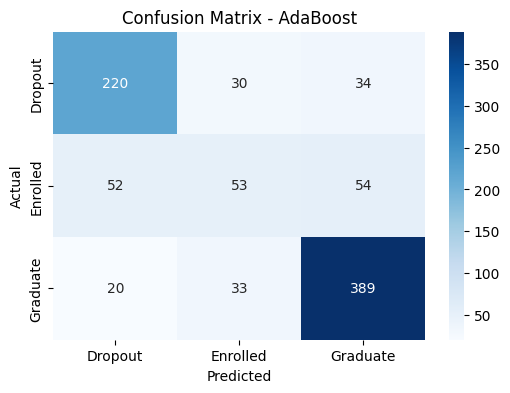

In [43]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
# Output hasil
print("Accuracy:", accuracy_ada)
print("\nClassification Report:\n", report_ada)
print("Cohen's Kappa Score:", kappa_ada)

Accuracy: 0.7480225988700565

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.75      0.77      0.76       284
    Enrolled       0.46      0.33      0.39       159
    Graduate       0.82      0.88      0.85       442

    accuracy                           0.75       885
   macro avg       0.68      0.66      0.67       885
weighted avg       0.73      0.75      0.74       885

Cohen's Kappa Score: 0.5810041633140064
